In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from joblib import Parallel, delayed
from string import ascii_lowercase
from scipy.optimize import curve_fit
from skimage.measure import block_reduce
import pandas as pd
from matplotlib.gridspec import GridSpec
from functions import *

In [14]:
# Path to where the data is stored. Make sure to create
# Data/ or modify the variable path accordingly
path = "Data"

# Fig 1

/tmp/ipykernel_58440/982133614.py:72: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(hm2, cax=cbar_ax, ticks=ticks, label="Period")


<Figure size 640x480 with 0 Axes>

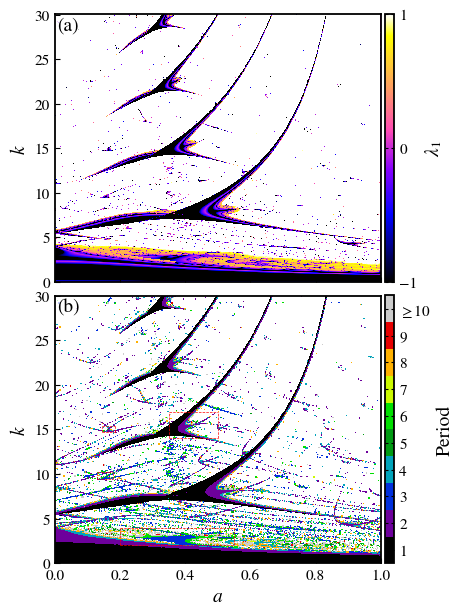

In [3]:
plot_params(fontsize=14)
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(4.5, 6))
xbox = 0.0072
ybox = 0.941
bbox = {"linewidth": 0.0, "facecolor": "w", "alpha": 0.75, "pad": 1}

grid = 1000
T = int(1e5)
t = int(5e4)

gamma = 0.8
k0, k1 = 0, 30
a0, a1 = 0, 1
df = "%s/lyapunov_k_vs_a_gamma=%s_k0=%s_k1=%s_a0=%s_a1=%s_T=%i_t=%i_grid=%i.dat" % (path, format_number(gamma, 5), format_number(k0, 5), format_number(k1, 5), format_number(a0, 5), format_number(a1, 5), T, t, grid)
y, x, z = extract_grid(df)
hm1 = ax[0].pcolor(x, y, z, cmap="gnuplot2", vmin=-1, vmax=1)
ax[0].set_ylabel("$k$")

gamma = 0.8
k0, k1 = 0, 20
a0, a1 = 0, 1
t = int(1e4)
df = "%s/period_k_vs_a_gamma=.80000_k0=.00000_k1=30.00000_a0=.00000_a1=1.00000_T=60000_t=50000_grid=1000.dat" % path
x, y, z = extract_grid(df)
z = np.array(z, dtype=np.float64)
z[np.where(z == -1)] = np.nan
cmap = plt.cm.nipy_spectral  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0.5, 10.5, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
hm2 = ax[1].pcolor(x, y, z, cmap=cmap, norm=norm)
ax[1].set_xlabel("$a$")
ax[1].set_ylabel("$k$")

lw = 0.5
idntfs = ["2a", "2b", "2c", "2d"]
for j, idntf in enumerate(idntfs):
    _, limits = get_params(idntf)
    ax[1].plot([limits[2], limits[2]], [limits[0], limits[1]], "r--", lw=lw)
    ax[1].plot([limits[3], limits[3]], [limits[0], limits[1]], "r--", lw=lw)
    ax[1].plot([limits[2], limits[3]], [limits[0], limits[0]], "r--", lw=lw)
    ax[1].plot([limits[2], limits[3]], [limits[1], limits[1]], "r--", lw=lw)

for i in range(ax.shape[0]):
    ax[i].text(xbox, ybox, "(%s)" % ascii_lowercase[i], transform=ax[i].transAxes, bbox=bbox)

ax[0].tick_params(axis="both", direction='in')
ax[1].tick_params(axis="both", direction='in')
ax[1].tick_params(axis="x", which="major", pad=4)

left = 0.11
bottom = 0.0725
right = 0.835
top = 0.9875
wspace = 0.225
hspace = 0.05 # 0.1
width = 0.02
length = 0.4465
pad = 0.01
cbar_ax = fig.add_axes([right + pad, bottom + length + 0.022, width, length])
cbar = fig.colorbar(hm1, cax=cbar_ax, ticks=[-1, 0, 1], label="$\\lambda_1$")
cbar.ax.yaxis.set_ticks_position('both')
cbar.ax.tick_params(axis="y",direction="in", length=2.5)

cbar_ax = fig.add_axes([right + pad, bottom, width, length])
ticks = np.arange(1, 11, 1)
cbar = fig.colorbar(hm2, cax=cbar_ax, ticks=ticks, label="Period")
ticks = list(ticks)
ticks[-1] = "$\\geq 10$"
cbar.ax.set_yticklabels(ticks)
cbar.ax.minorticks_off()
cbar.ax.yaxis.set_ticks_position('both')
cbar.ax.tick_params(axis="y",direction="in", length=2.5)

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, hspace=hspace)
plt.savefig("Figures/fig1.png", dpi=600)

# Fig 2

/tmp/ipykernel_58440/1233760915.py:71: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(hm2, cax=cbar_ax, ticks=ticks, label="Period")


<Figure size 640x480 with 0 Axes>

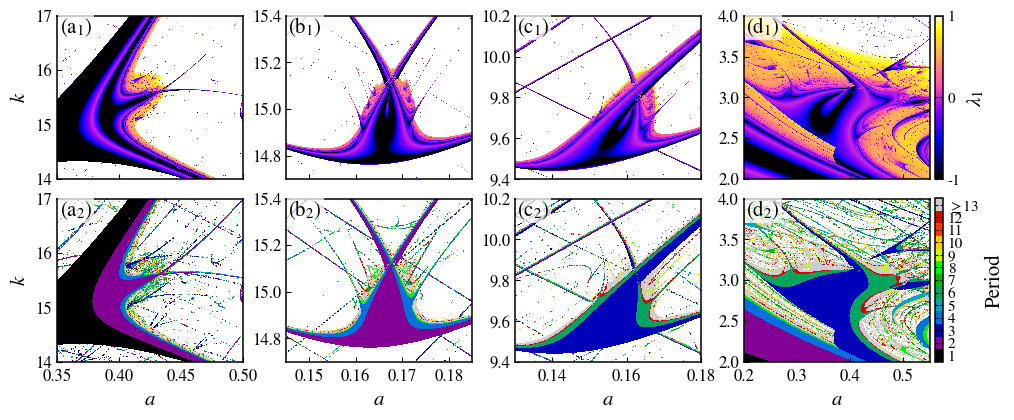

In [4]:
fonts = plot_params(fontsize=15, axes_linewidth=1.1)
fig, ax = plt.subplots(2, 4, figsize=(10, 4))
xbox = 0.014
ybox = 0.896
bbox = {"linewidth": 0.0, "facecolor": "w", "alpha": 0.75, "pad": 1}

grid = 1000
T = int(1e5)
t = int(5e4)
gamma = 0.8
xticks = [[0.35, 0.4, 0.45, 0.5], [0.15, 0.16, 0.17, 0.18], [0.14, 0.16, 0.18], [0.2, 0.3, 0.4, 0.5]]

idntfs = ["2a", "2b", "2c", "2d"]
for j, idntf in enumerate(idntfs):
    _, limits = get_params(idntf)
    k0, k1, a0, a1 = limits
    df = "%s/lyapunov_k_vs_a_gamma=%s_k0=%s_k1=%s_a0=%s_a1=%s_T=%i_t=%i_grid=%i.dat" % (path, format_number(gamma, 5), format_number(k0, 5), format_number(k1, 5), format_number(a0, 5), format_number(a1, 5), T, t, grid)
    y, x, z = extract_grid(df)
    hm1 = ax[0, j].pcolor(x, y, z, cmap="gnuplot2", vmin=-1, vmax=1)

    df = "%s/period_k_vs_a_gamma=.80000_k0=%s_k1=%s_a0=%s_a1=%s_T=60000_t=50000_grid=1000.dat" % (path, format_number(k0, 5), format_number(k1, 5), format_number(a0, 5), format_number(a1, 5))
    x, y, z = extract_grid(df)
    z = np.array(z, dtype=np.float64)
    z[np.where(z == -1)] = np.nan
    cmap = plt.cm.nipy_spectral  # define the colormap
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N)
    # define the bins and normalize
    bounds = np.linspace(0.5, 13.5, 14)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    hm2 = ax[1, j].pcolor(x, y, z, cmap=cmap, norm=norm)

    ax[0, j].set_xlim(a0, a1)
    ax[1, j].set_xlim(a0, a1)
    ax[0, j].set_ylim(k0, k1)
    ax[1, j].set_ylim(k0, k1)
    for i in range(2):
        ax[i, j].set_xticks(xticks[j])
    ax[0, j].set_xticklabels([])

    ax[0, j].tick_params(axis="both", direction='in')
    ax[1, j].tick_params(axis="both", direction='in')
    ax[1, j].tick_params(axis="x", which="major", pad=5)

for i in range(ax.shape[1]):
    ax[0, i].text(xbox, ybox, "(%s$_1$)" % ascii_lowercase[i], transform=ax[0, i].transAxes, bbox=bbox)
    ax[1, i].text(xbox, ybox, "(%s$_2$)" % ascii_lowercase[i], transform=ax[1, i].transAxes, bbox=bbox)

[ax[i, 0].set_ylabel("$k$") for i in range(ax.shape[0])]
[ax[-1, i].set_xlabel("$a$") for i in range(ax.shape[1])]
left = 0.052
bottom = 0.12
right = 0.925
top = 0.985
wspace = 0.23
hspace = 0.12 # 0.1
width = 0.008
length = 0.4085
pad = 0.005
cbar_ax = fig.add_axes([right + pad, bottom + length + 0.048, width, length])
cbar = fig.colorbar(hm1, cax=cbar_ax, ticks=[-1, 0, 1], label="$\\lambda_1$")
cbar.ax.set_yticklabels([-1, 0, 1], fontsize=fonts[1] - 3)
cbar.ax.yaxis.set_ticks_position('both')
cbar.ax.tick_params(axis="y",direction="in", length=2.5)

cbar_ax = fig.add_axes([right + pad, bottom, width, length])
ticks = np.arange(1, 14, 1)
cbar = fig.colorbar(hm2, cax=cbar_ax, ticks=ticks, label="Period")
ticks = list(ticks)
ticks[-1] = "$\\geq 13$"
cbar.ax.set_yticklabels(ticks, fontsize=fonts[1] - 3)
cbar.ax.minorticks_off()
cbar.ax.yaxis.set_ticks_position('both')
cbar.ax.tick_params(axis="y",direction="in", length=2.5)

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, hspace=hspace, wspace=wspace)
plt.savefig("Figures/fig2.png", dpi=300)

# Fig 3

In [5]:
k0 = 0
k1 = 200
a0 = 0
a1 = 1
limits = [114, 128, 0.26, 0.32]
k0z = limits[0]
k1z = limits[1]
a0z = limits[2]
a1z = limits[3]
gridz = 1000
grid = int(1000)
T = int(1e5)
t = int(5e4)
gammas = [0.8, 0.85, 0.9, 0.95]

In [6]:
df_coeffs = pd.read_csv("%s/coeffs.csv" %  path)

<Figure size 640x480 with 0 Axes>

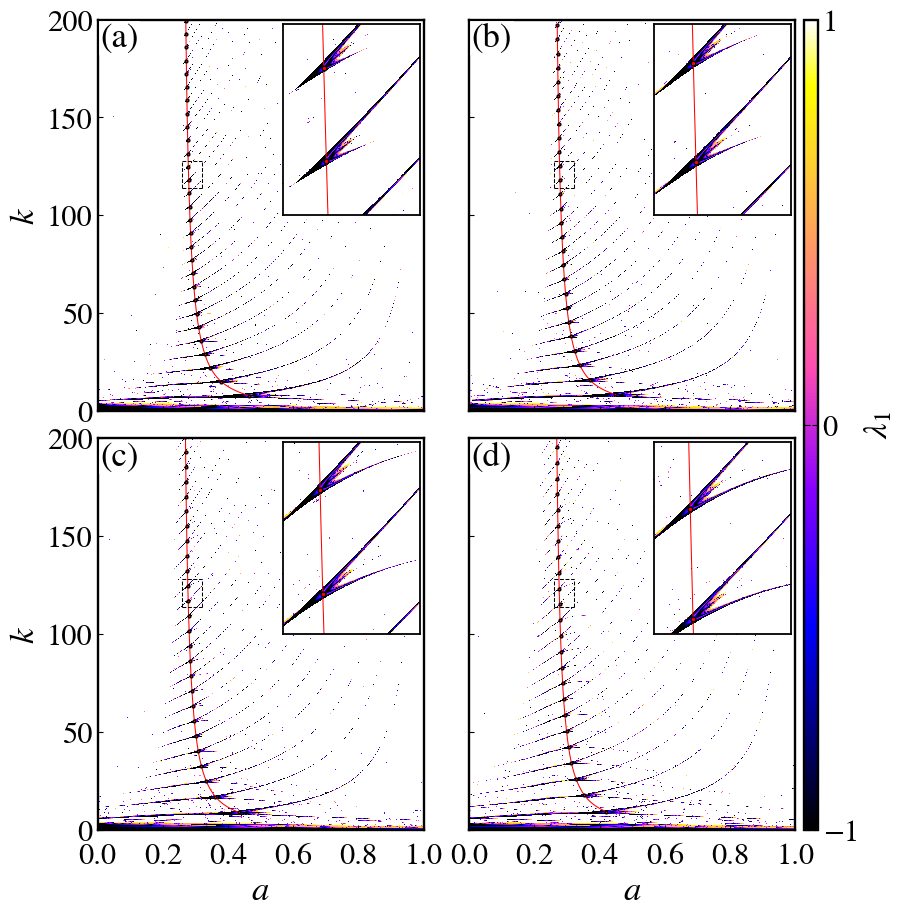

In [7]:
sizes = plot_params(fontsize=25, axes_linewidth=1.7)
cmap = "gnuplot2"
vmin = -1
vmax = -vmin
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))
xbox = 0.0077
ybox = 0.9325
bbox = {'linewidth': 0.0, 'facecolor': 'w', 'alpha': 0.75, 'pad': 1}
for j, gamma in enumerate(gammas):
    df = "%s/lyapunov_k_vs_a_gamma=%s_k0=%s_k1=%s_a0=%s_a1=%s_T=%i_t=%i_grid=%i.dat" % (path, format_number(gamma, 5), format_number(k0, 5), format_number(k1, 5), format_number(a0, 5), format_number(a1, 5), T, t, grid)
    y, x, z = extract_grid(df)
    hm = ax[int(j / 2), j % 2].pcolor(x, y, z, cmap=cmap, vmin=vmin, vmax=vmax)
    coeffs = np.array(df_coeffs["gamma=%.2f" % gamma])
    df_ak = pd.read_csv("%s/a_and_k_gamma=%.2f.csv" % (path, gamma))
    a_s = np.array(df_ak["a"])
    k_s = np.array(df_ak["k"])
    x_new = np.linspace(k_s.min(), k_s.max(), 1000)
    y_new = sum(coeffs[i]*x_new**((coeffs.shape[0] - 1) - i) for i in range(coeffs.shape[0]))
    ax[int(j / 2), j % 2].plot(y_new, x_new, c="red", lw=0.75, zorder=1)
    ax[int(j / 2), j % 2].scatter(a_s, k_s, s=4, c="red", zorder=2, edgecolors= "black")
    ax[int(j / 2), j % 2].text(xbox, ybox, "(%s)" % ascii_lowercase[j], transform=ax[int(j / 2), j % 2].transAxes, bbox=bbox)
    ax_ins = ax[int(j / 2), j % 2].inset_axes([0.5675, 0.5, 0.42, 0.49])
    ax_ins.set_xticks([])
    ax_ins.set_yticks([])
    for spine in ax_ins.spines.values():
        spine.set_edgecolor("k")
    [x.set_linewidth(sizes[2] - 0.4) for x in ax_ins.spines.values()]
    ax[int(j / 2), j % 2].plot([a0z, a0z], [k0z, k1z], "--", c="k", lw=0.75)
    ax[int(j / 2), j % 2].plot([a0z, a1z], [k0z, k0z], "--", c="k", lw=0.75)
    ax[int(j / 2), j % 2].plot([a1z, a1z], [k0z, k1z], "--", c="k", lw=0.75)
    ax[int(j / 2), j % 2].plot([a0z, a1z], [k1z, k1z], "--", c="k", lw=0.75)
    ax[int(j / 2), j % 2].tick_params(axis="both", direction='in')
    ax[int(j / 2), j % 2].tick_params(axis="x", which="major", pad=9)

    #ax[int(j / 2), j % 2].tick_params(axis='x', which='major', pad=25)
    df = "%s/lyapunov_k_vs_a_gamma=%s_k0=%s_k1=%s_a0=%s_a1=%s_T=%i_t=%i_grid=%i.dat" % (path, format_number(gamma, 5), format_number(k0z, 5), format_number(k1z, 5), format_number(a0z, 5), format_number(a1z, 5), T, t, gridz)
    y, x, z = extract_grid(df)
    hmz = ax_ins.pcolor(x, y, z, cmap=cmap, vmin=vmin, vmax=vmax)
    ax_ins.plot(y_new, x_new, c="red", lw=0.75, zorder=1)
    ax_ins.scatter(a_s, k_s, s=12, c="red", zorder=2, edgecolors= "black")
    ax_ins.set_xlim(a0z, a1z)
    ax_ins.set_ylim(k0z, k1z)
ax[0, 0].set_ylabel("$k$")
ax[1, 0].set_ylabel("$k$")
ax[-1, 0].set_xlabel("$a$")
ax[-1, 1].set_xlabel("$a$")
ax[0, 0].set_ylim(0, 200)
ax[0, 0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[0, 0].set_xlim(0, 1)
fig.subplots_adjust(left=0.105, bottom=0.08, right=0.88, top=0.98, hspace=0.07, wspace=0.14)
cbar_ax = fig.add_axes([0.89, 0.08, 0.015, 0.98 - 0.08])
cbar = fig.colorbar(hm, cax=cbar_ax, ticks=[-1, 0, 1], label="$\\lambda_1$")
cbar.ax.yaxis.set_ticks_position('both')
cbar.ax.tick_params(axis="y",direction="in", length=4)
#fig.colorbar(hm, cax=cbar_ax, label="$\\lambda_1$")
plt.savefig("Figures/fig3.png", dpi=500)

# Fig 4

<Figure size 640x480 with 0 Axes>

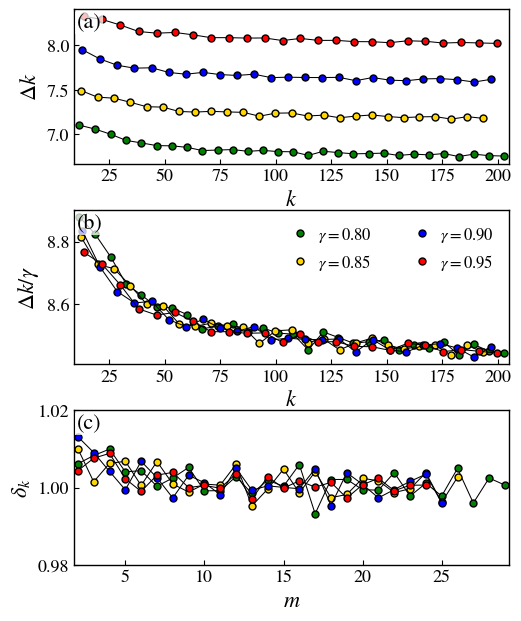

In [8]:
plot_params(fontsize=16, legend_fontsize=12, axes_linewidth=1.0)
xbox = 0.0059
ybox = 0.881
bbox = {'linewidth': 0.0, 'facecolor': 'w', 'alpha': 0.75, 'pad': 1}
colors = ["g", "gold", "blue", "red"]
fig, ax = plt.subplots(3, 1, sharex=False, figsize=(5, 6))
lw = 0.75
ms = 5
gammas = [0.8, 0.85, 0.9, 0.95]
for j, gamma in enumerate(gammas):
    df_ak = pd.read_csv("%s/a_and_k_gamma=%.2f.csv" % (path, gamma))
    k_s = np.array(df_ak["k"])
    diff_ks = np.diff(k_s)
    kmean = np.zeros_like(diff_ks)
    for jj in range(kmean.shape[0]):
        kmean[jj] = (k_s[jj + 1] + k_s[jj])/2
    delta = []
    for i in range(2, len(k_s)):
        delta.append((k_s[i - 1] - k_s[i - 2])/(k_s[i] - k_s[i - 1]))
    alpha = []
    for i in range(1, len(k_s)):
        alpha.append(k_s[i - 1]/k_s[i])

    ax[0].plot(kmean, diff_ks, "k-", lw=lw)
    ax[0].plot(kmean, diff_ks, "o", markeredgecolor="k", markersize=ms, c=colors[j], label="$\\gamma = %.2f$" % gamma)
    ax[0].set_ylabel("$\\Delta{k}$")
    ax[0].set_xlabel("$k$")
    ax[0].set_xlim(9, 205)

    ax[1].plot(kmean, diff_ks/gamma, "k-", lw=lw)
    ax[1].plot(kmean, diff_ks/gamma, "o", markeredgecolor="k", markersize=ms, c=colors[j], label="$\\gamma = %.2f$" % gamma)
    ax[1].set_ylabel("$\\Delta{k}/\\gamma$")
    ax[1].set_xlabel("$k$")
    ax[1].legend(loc="upper right", frameon=False, handletextpad=0.1, ncol=2)
    ax[1].set_xlim(9, 205)

    ns = np.arange(2, len(k_s))
    ax[2].plot(ns, delta, "k-", lw=lw)
    ax[2].plot(ns, delta, "o", markeredgecolor="k", markersize=ms, c=colors[j])
    ax[2].set_xlabel("$m$")
    ax[2].set_ylabel("$\\delta_k$")
    ax[2].set_xlim(1.75, 29.25)
    ax[2].set_ylim(0.98, 1.02)

for i in range(ax.shape[0]):
    ax[i].text(xbox, ybox, "(%s)" % ascii_lowercase[i], transform=ax[i].transAxes, bbox=bbox)
    ax[i].tick_params(axis="both", direction='in')
    #ax[i].tick_params(axis="x", which="major", pad=9)

plt.subplots_adjust(left=0.125, bottom=0.072, right=0.995, top=0.998, hspace=0.3)
plt.savefig("Figures/fig4.png", dpi=500)

# Fig 5

<Figure size 640x480 with 0 Axes>

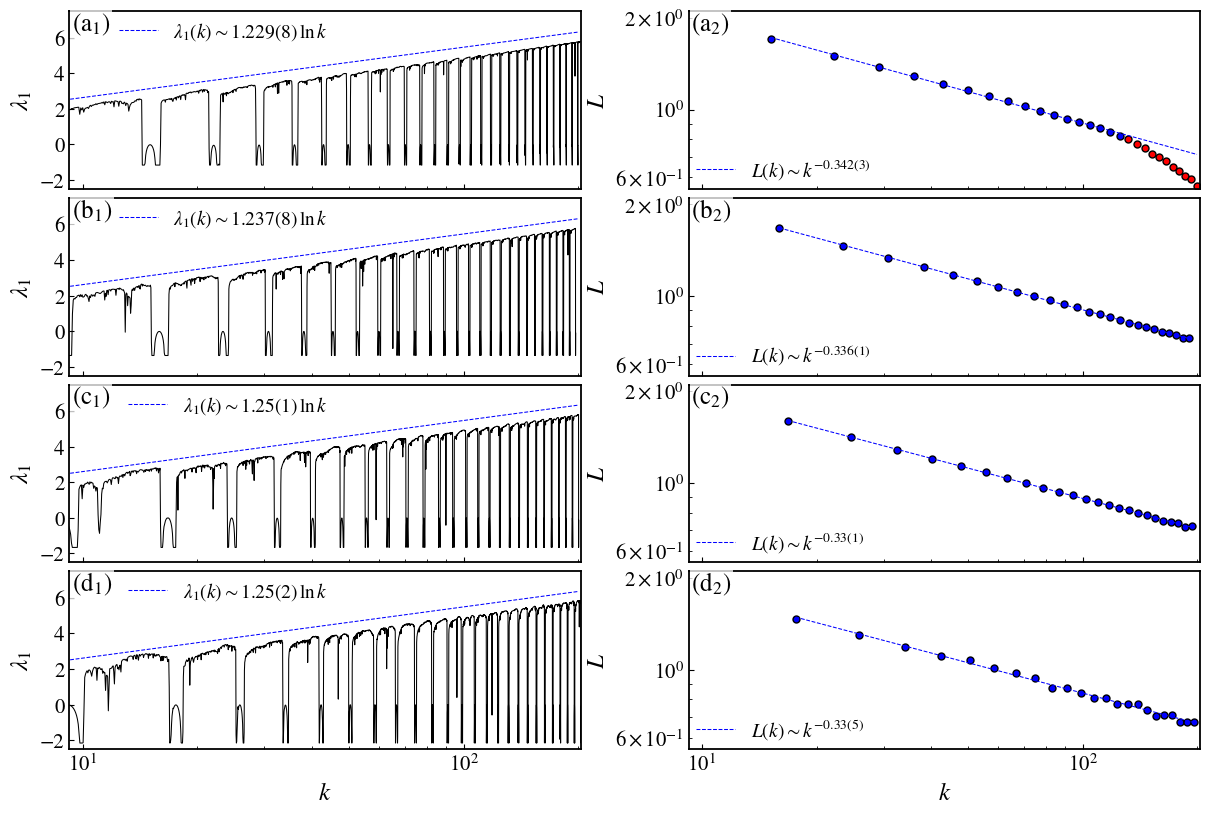

In [9]:
fontsize, _, _ = plot_params(legend_fontsize=14, fontsize=18)
xbox = 0.005
ybox = 0.889
bbox = {'linewidth': 0.0, 'facecolor': 'w', 'alpha': 0.75, 'pad': 1}
fig, ax = plt.subplots(4, 2, sharex=True, figsize=(12, 8))
colors = ["g", "gold", "blue", "red"]
t_trans = int(1e5)
t_end = int(2e5)
gammas = [0.8, 0.85, 0.9, 0.95]
num_k = 1000000
num_k_shrimp = 1000
nm = [300, 250, 250, 250]
CA = []
threshold = 0.0
threshold2 = 0.0

for j, gamma in enumerate(gammas):
    df = pd.read_csv("%s/a_and_k_gamma=%.2f.csv" % (path, gamma))
    a_s = np.array(df["a"])
    k_s = np.array(df["k"])
    num_shrimp = len(k_s)    

    df = "%s/lyapunov_vs_a(k)_gamma=%s_T=%i_t=%i_nk=%i.dat" % (path, format_number(gamma, 5), t_end, t_trans, num_k)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    a = np.array(df[0])
    k = np.array(df[1])
    lyap = np.array(df[2])
    lyap_max = block_reduce(lyap, nm[j], np.mean)[:-1]
    k_max = block_reduce(k, nm[j], np.mean)[:-1]
    ax[j, 0].plot(k_max, lyap_max, "-", lw=0.75, zorder=1, c="k")#, label="$\\gamma = %.2f$" % gamma)
    ax[j, 0].set_xlim(k.min(), k.max())

    widths = []
    kk = []
    for ii in range(1, num_shrimp - 1):
        df = "%s/lyapunov_vs_a(k)_gamma=%s_T=%i_t=%i_nk=%i_nshrimp=%i.dat" % (path, format_number(gamma, 5), t_end, t_trans, num_k_shrimp, ii)
        df = pd.read_csv(df, header=None, delim_whitespace=True)
        a = np.array(df[0])
        k = np.array(df[1])
        lyap = np.array(df[2])
        if gamma == 0.95:
            nm = 10
            lyap = block_reduce(lyap, nm, np.mean)[:-1]
            k = block_reduce(k, nm, np.mean)[:-1]
        shrimp = False
        for i in range(1, lyap.shape[0] - 1):
            if lyap[i - 1] > threshold and lyap[i] < threshold:
                k_ini = (k[i] + k[i - 1])/2
                shrimp = True
            elif lyap[i - 1] < threshold and lyap[i] > threshold and shrimp:
                k_end = (k[i] + k[i - 1])/2
                if k_ini < k_s[ii] and k_end > k_s[ii]:
                    shrimp = False
                    kk.append((k_end + k_ini)/2)
                    widths.append(k_end - k_ini)
                else:
                    shrimp = False

    #print(gamma, widths)
    ax[j, 0].set_ylim(-2.5, 7.5)
    ax[j, 0].set_ylabel("$\\lambda_1$")

    # lyap_max = lyap
    # k_max = k
    nm2 = 32
    pos_lyap = block_reduce(lyap_max, nm2, np.max)[:-1]
    pos_k = []
    for i in range(len(pos_lyap)):
        pos_k.append(np.where(lyap_max == pos_lyap[i])[0][0])
    pos_k = np.array(pos_k)
    pos_k = k_max[pos_k]
    #ax[j, 0].plot(pos_k, pos_lyap, "ro", markersize=5, markeredgecolor="k")
    popt, pcov = np.polyfit(np.log(pos_k), pos_lyap, 1, cov=True)
    ca2, cl2 = popt
    std_ca2 = np.sqrt(np.diag(pcov)[0])
    num_unc = int(-np.floor(np.log10(std_ca2)))
    #print(ca2, cl2, std_ca2, num_unc)
    x_new = np.logspace(np.log10(5), np.log10(200), 1000)
    y_new = cl2*x_new**ca2
    y_new = cl2 + ca2 * np.log(x_new) + .6
    ax[j, 0].plot(x_new, y_new, "b--", lw=0.75, label="$\\lambda_1(k) \\sim %g(%s)\,\\ln{k}$" % (round(ca2, num_unc), str(round(std_ca2, num_unc))[num_unc + 1]))
    ax[j, 0].legend(bbox_to_anchor=(0.52, 0.99), loc="upper right", borderaxespad=0, frameon=False)
    ax[j, 0].set_yticks([-2, 0, 2, 4, 6])


    if gamma == 0.80:
        excl = -11
        ax[j, 1].plot(kk[:excl], widths[:excl], "o", markersize=5, markeredgecolor="k", c="b")
        ax[j, 1].plot(kk[excl:], widths[excl:], "o", markersize=5, markeredgecolor="k", c="r")
    else:
        excl = -1
        ax[j, 1].plot(kk, widths, "o", markersize=5, markeredgecolor="k", c="b")
    popt, pcov = np.polyfit(np.log10(kk[:excl]), np.log10(widths[:excl]), 1, cov=True)
    ca, cl = popt
    std_ca = np.sqrt(np.diag(pcov)[0])
    num_unc = int(-np.floor(np.log10(std_ca)))
    #print(ca, cl, std_ca, num_unc)
    CA.append(ca)
    x_new = np.logspace(np.log10(min(kk)), np.log10(max(kk)), 1000)
    y_new = (10**cl)*x_new**ca
    ax[j, 1].plot(x_new, y_new, "--", lw=0.75, label="$L(k) \\sim k^{%g(%s)}$" % (round(ca, num_unc), str(round(std_ca, num_unc))[num_unc + 1]), c="b")

    ax[j, 1].legend(loc="lower left", frameon=False, borderaxespad=0)
    ax[j, 1].set_yscale("log")
    ax[j, 1].set_ylim(5.5e-1, 2.1e0)
    ax[j, 1].set_ylabel("$L$")
    ax[j, 0].tick_params(axis="both", which="both", direction='in')
    ax[j, 1].tick_params(axis="both", which="both", direction='in')
ax[0, 0].set_xscale("log")
ax[-1, 0].set_xlabel("$k$")
ax[-1, 1].set_xlabel("$k$")

for i in range(ax.shape[0]):
    ax[i, 0].text(xbox, ybox, "(%s$_1$)" % ascii_lowercase[i], transform=ax[i, 0].transAxes, bbox=bbox)
    ax[i, 1].text(xbox, ybox, "(%s$_2$)" % ascii_lowercase[i], transform=ax[i, 1].transAxes, bbox=bbox)

plt.subplots_adjust(left=0.055, bottom=0.07, right=0.9975, top=0.9925, wspace=0.21, hspace=0.05)
plt.savefig("Figures/fig5.png", dpi=500)

# Fig. 6

In [38]:
gamma = 0.80
_ = lyapunov(1, 1, 15, 0.5, gamma, 10, 20)

df = pd.read_csv("%s/coeffs.csv" % path)
coeffs = np.array(df["gamma=%.2f" % gamma])
order = int(np.array(df["Order"])[-1])

df = pd.read_csv("%s/a_and_k_gamma=%.2f.csv" % (path, gamma))
a_s = np.array(df["a"])
k_s = np.array(df["k"])

t_trans = int(5e4)
t_end = int(1e5)
k_ini = k_s.min()
k_end = k_s.max()
num_k = 500

num_shrimp = 22
dk = k_s[num_shrimp] - k_s[num_shrimp - 1]
k_ini = k_s[num_shrimp] - dk/5
k_end = k_s[num_shrimp] + dk/5
k = np.linspace(k_ini, k_end, num_k)
a = sum(coeffs[i]*k**(order - i) for i in range(coeffs.shape[0]))

158.68413


In [39]:
%%time
theta = 1.78
I = 0.0
lypnv = lyapunov(theta, I, k, a, gamma, t_trans, t_end)

CPU times: user 9.76 s, sys: 15.3 ms, total: 9.77 s
Wall time: 1.36 s


In [40]:
%%time
theta = 1.5
I = 146
lypnv2 = lyapunov(theta, I, k, a, gamma, t_trans, t_end)

CPU times: user 9.52 s, sys: 7.86 ms, total: 9.53 s
Wall time: 1.33 s


In [41]:
df = "%s/lyapunov_phase_space_k=158.40000_a=0.27372_gamma=0.80.dat" % path
x, y, z = extract_grid(df)

In [42]:
df = "%s/lyapunov_phase_space_k=158.40000_a=0.27372_gamma=0.80_zoom.dat" % path
xzoom, yzoom, zzoom = extract_grid(df)

<Figure size 640x480 with 0 Axes>

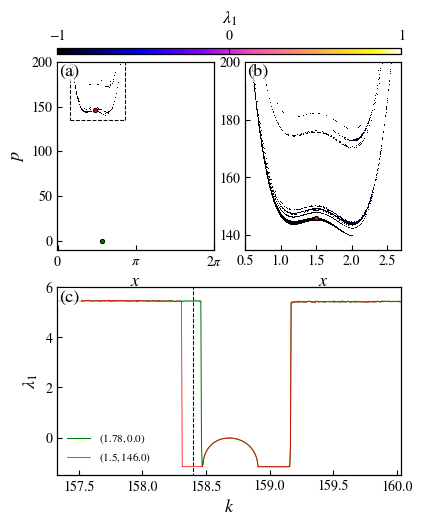

In [43]:
plot_params(fontsize=13, axes_linewidth=0.9, legend_fontsize=8)
xbox = 0.0064
ybox = 0.9225
bbox = {'linewidth': 0.0, 'facecolor': 'w', 'alpha': 0.75, 'pad': 1}
lw = 0.75
gs = GridSpec(2, 2)

fig = plt.figure(figsize=(4, 5))


ax1 = fig.add_subplot(gs[0, 0])
hm = ax1.pcolor(x, y, z, cmap="gnuplot2", vmin=-1, vmax=1)
ax1.set_xlabel("$x$")
ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(["$0$", "$\\pi$", "$2\\pi$"])
ax1.set_ylabel("$p$")
ax1.plot(1.5, 146.0, "ro", markersize=3, markeredgecolor="k", markeredgewidth=0.75)
ax1.plot(1.78, 0, "go", markersize=3, markeredgecolor="k", markeredgewidth=0.75)
ax1.plot([0.5, 2.7], [135, 135], "k--", lw=lw)
ax1.plot([2.7, 2.7], [135, 200], "k--", lw=lw)
ax1.plot([0.5, 0.5], [200, 135], "k--", lw=lw)
ax1.tick_params(axis="both", which="both", direction='in')
ax1.text(0.013, 0.9225, "(a)", transform=ax1.transAxes, bbox=bbox)

ax2 = fig.add_subplot(gs[0, 1])
hm = ax2.pcolor(xzoom, yzoom, zzoom, cmap="gnuplot2", vmin=-1, vmax=1)
ax2.set_xlabel("$x$")
ax2.plot(1.5, 146.0, "ro", markersize=3, markeredgecolor="k", markeredgewidth=0.75)
ax2.set_xticks([0.5, 1, 1.5, 2, 2.5])
ax2.tick_params(axis="both", which="both", direction='in')
ax2.text(0.013, 0.9225, "(b)", transform=ax2.transAxes, bbox=bbox)

ax3 = fig.add_subplot(gs[1, :])
ax3.plot(k, lypnv, "g-", zorder=1, lw=lw, label="$(1.78, 0.0)$")
ax3.plot(k, lypnv2, "r-", zorder=2, lw=lw - 0.2, label="$(1.5, 146.0)$")
ax3.set_xlim(k.min(), k.max())
ax3.set_ylim(-1.5, 6)
ax3.set_xlabel("$k$")
ax3.set_ylabel("$\\lambda_1$")
ax3.legend(loc="lower left", frameon=False)
ax3.plot([158.4, 158.4], [-2, 6], "k--", lw=lw, zorder=0)
ax3.tick_params(axis="both", which="both", direction='in')
ax3.text(0.0062, 0.9225, "(c)", transform=ax3.transAxes, bbox=bbox)


left = 0.11
bottom = 0.073
right = 0.97
top = 0.90
hspace = 0.2
pad = 0.015
width = right - left
length = 0.013

cbar_ax = fig.add_axes([left, top + pad, width, length])
cbar = fig.colorbar(hm, cax=cbar_ax, ticks=[-1, 0, 1], label="$\\lambda_1$", orientation="horizontal")
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
#cbar.ax.set_yticklabels([-1, 0, 1)
cbar.ax.xaxis.set_ticks_position('both')
cbar.ax.tick_params(axis="x",direction="in", length=2)

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, hspace=hspace)
plt.savefig("Figures/fig6.png", dpi=500)